In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

In [36]:
df = pd.read_excel('Book1.xlsx', engine='openpyxl')
df.head()

,Name,Age,Gender,Contact,Name of School,Current Grade Level,Region of School,Do you have access to a device for online Learning?,"If yes, what type of device do you use?",How comfortable are you with using digital devices for Learning?,...,What is your preferred learning style?,Have you used an online learning platform before?,"If yes, please specify",What is your level of experience with online/remote learning platforms?,What are the main challenges you have faced (or expect to face) with online learning?,"If others, please specify",What kind of support would you find most helpful in transitioning to technology-enabled learning?,Have you heard about the TeOSS project before?,"If yes, what do you know about the TeOSS project?",What are your expectations for the TeOSS Learners Training Program?
0,Zanu Edudzi,10,Male,NaN,Akatsi no I basic school,Primary 2,Volta,Yes,Tablet,Very Comfortable,...,"Visual (videos, diagrams)",No,NaN,Some experience,Balancing schoolwork with other responsibilities,NaN,Training on how to use online learning platforms,No,NaN,They should come over again
1,KLU RAPHEAL,10,Male,NaN,AKATSI NO 1 BASIC SCHOOL,Primary 2,Volta,Yes,Tablet,Comfortable,...,"Visual (videos, diagrams)",No,NaN,Some experience,Balancing schoolwork with other responsibilities,NaN,Access to technical support and troubleshooting,No,NaN,Learn more on the internet
2,Padmon nana adu,10,Male,NaN,Enchi RC BASIC SCHOOL,Primary 4,Western,Yes,Tablet,Moderate,...,"Visual (videos, diagrams)",No,NaN,Some experience,Lack of access to reliable internet/devices,NaN,Training on how to use online learning platforms,No,NaN,To be able to use the online platform to learn
3,Peter Amanie,10,Male,NaN,Enchi Roman Catholic,Primary 4,Western,Yes,Smartphone,Very Comfortable,...,"Visual (videos, diagrams)",No,NaN,Some experience,Lack of access to reliable internet/devices,NaN,Training on how to use online learning platforms,Yes,To provide basic digital skills,To learn more about Toess
4,Abdulai Abubakari,10,Male,0248549193,Akatsi No 1 Basic school,Primary 3,Volta,No,NaN,Moderate,...,Kinesthetic (hands-on activities),No,NaN,No experience,Difficulty staying engaged and motivated,NaN,Training on how to use online learning platforms,No,NaN,I'm expecting to learn


In [37]:
df.shape

(656, 24)

In [38]:
df.dtypes

Name                                                                                                 object
Age                                                                                                   int64
Gender                                                                                               object
Contact                                                                                              object
Name of School                                                                                       object
Current Grade Level                                                                                  object
Region of School                                                                                     object
Do you have access to a device for online Learning?                                                  object
If yes, what type of device do you use?                                                              object
How comfortable are you with

In [39]:
df["Age"].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 26, 45,  6,  7,  8,
        9])

In [40]:
df.describe()

,Age
count,656.000000
mean,12.838415
std,2.614368
min,6.000000
25%,12.000000
50%,13.000000
75%,14.000000
max,45.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 24 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Name                                                                                               656 non-null    object
 1   Age                                                                                                656 non-null    int64 
 2   Gender                                                                                             656 non-null    object
 3   Contact                                                                                            461 non-null    object
 4   Name of School                                                                                     656 non-null    object
 5   C

In [42]:
df = df[pd.to_numeric(df['Age'], errors='coerce').notnull()]

In [43]:
df["Age"] = df["Age"].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 24 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Name                                                                                               656 non-null    object
 1   Age                                                                                                656 non-null    int64 
 2   Gender                                                                                             656 non-null    object
 3   Contact                                                                                            461 non-null    object
 4   Name of School                                                                                     656 non-null    object
 5   C

In [45]:
df.isna().sum()

Name                                                                                                   0
Age                                                                                                    0
Gender                                                                                                 0
Contact                                                                                              195
Name of School                                                                                         0
Current Grade Level                                                                                    0
Region of School                                                                                       0
Do you have access to a device for online Learning?                                                    0
If yes, what type of device do you use?                                                              131
How comfortable are you with using digital devices for 

In [46]:
df.duplicated().sum()

np.int64(1)

In [47]:
df["Age"].value_counts()

Age
14    148
13    138
12     93
11     70
15     66
10     33
9      27
8      25
16     24
17     10
7       5
18      5
19      3
6       3
21      2
20      2
45      1
26      1
Name: count, dtype: int64

In [48]:
age_counts = df["Age"].value_counts()
age_counts

Age
14    148
13    138
12     93
11     70
15     66
10     33
9      27
8      25
16     24
17     10
7       5
18      5
19      3
6       3
21      2
20      2
45      1
26      1
Name: count, dtype: int64

In [49]:
# Print the gender counts
print("Age Distribution:")
print(age_counts)

Age Distribution:
Age
14    148
13    138
12     93
11     70
15     66
10     33
9      27
8      25
16     24
17     10
7       5
18      5
19      3
6       3
21      2
20      2
45      1
26      1
Name: count, dtype: int64


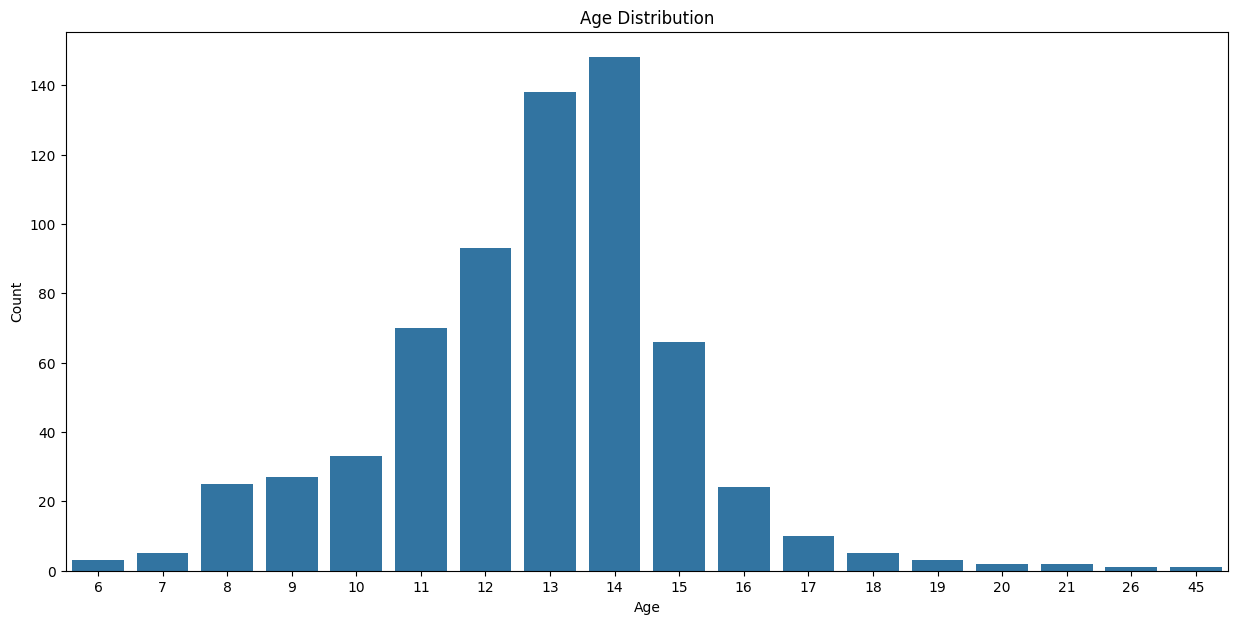

In [50]:
plt.figure(figsize = (15,7))
sns.barplot(data = age_counts)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("age.png")
plt.show()

In [51]:
df["Gender"].value_counts()

Gender
Male      357
Female    299
Name: count, dtype: int64

In [52]:
gender_counts = df["Gender"].value_counts()

Gender Distribution:
Gender
Male      357
Female    299
Name: count, dtype: int64


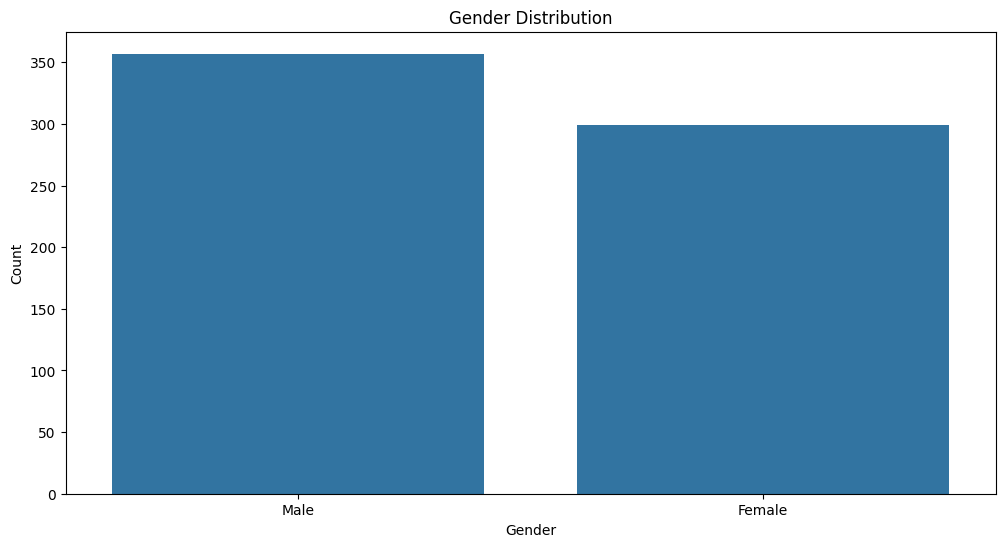

In [53]:
# Print the gender counts
print("Gender Distribution:")
print(gender_counts)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data = gender_counts)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("gender")
plt.show()

In [54]:
region_counts = df["Region of School"].value_counts()
region_counts

Region of School
Central        273
Western        212
Eastern         46
Volta           43
Northern        36
Upper West      17
Brong Ahafo     16
Upper East      13
Name: count, dtype: int64

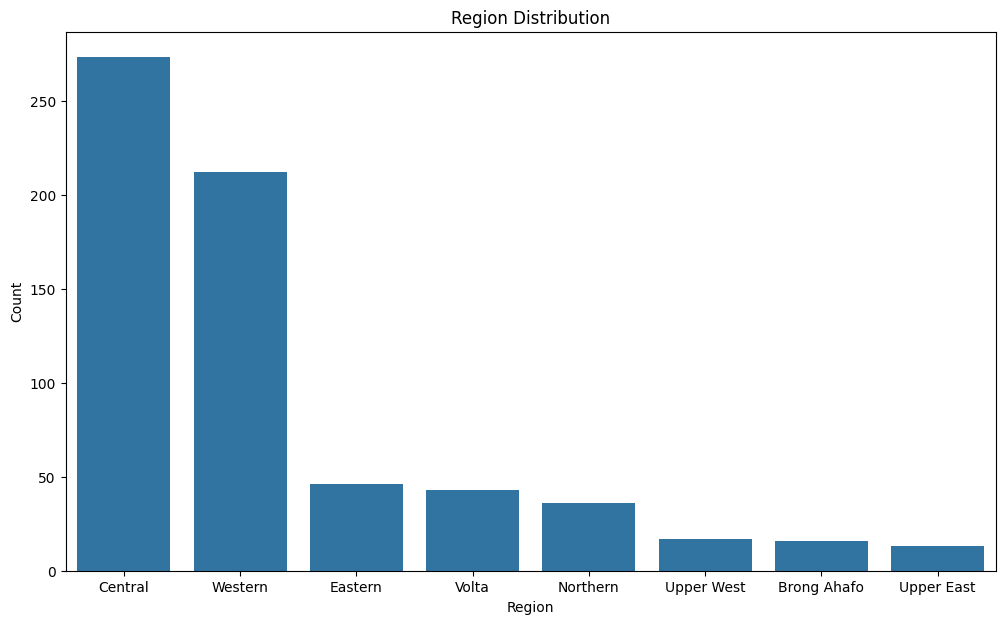

In [55]:
plt.figure(figsize=(12, 7))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.savefig('region_dis.png')
plt.show()

In [56]:
device_use_online = df["If yes, what type of device do you use?"]

In [57]:
device_use_online.value_counts()

If yes, what type of device do you use?
Smartphone          386
Tablet              108
Laptop               25
Desktop Computer      6
Name: count, dtype: int64

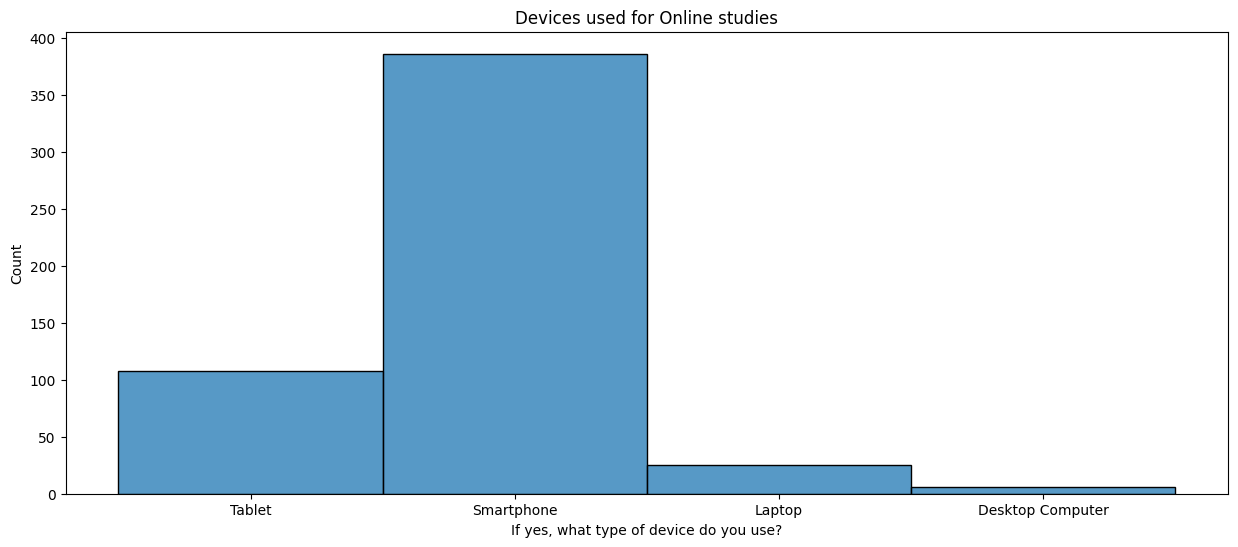

In [58]:
plt.figure(figsize = (15,6))
sns.histplot(data = device_use_online)
plt.title("Devices used for Online studies")
plt.savefig("devices_used.png")
plt.show()

In [59]:
support_needs = df["What kind of support would you find most helpful in transitioning to technology-enabled learning?"].value_counts()
print(support_needs)

What kind of support would you find most helpful in transitioning to technology-enabled learning?
Training on how to use online learning platforms                       516
Opportunities for virtual peer collaboration and social interaction     63
Tips for staying engaged and motivated in remote settings               28
Guidance on time management and balancing responsibilities              25
Access to technical support and troubleshooting                         20
Others                                                                   4
Name: count, dtype: int64


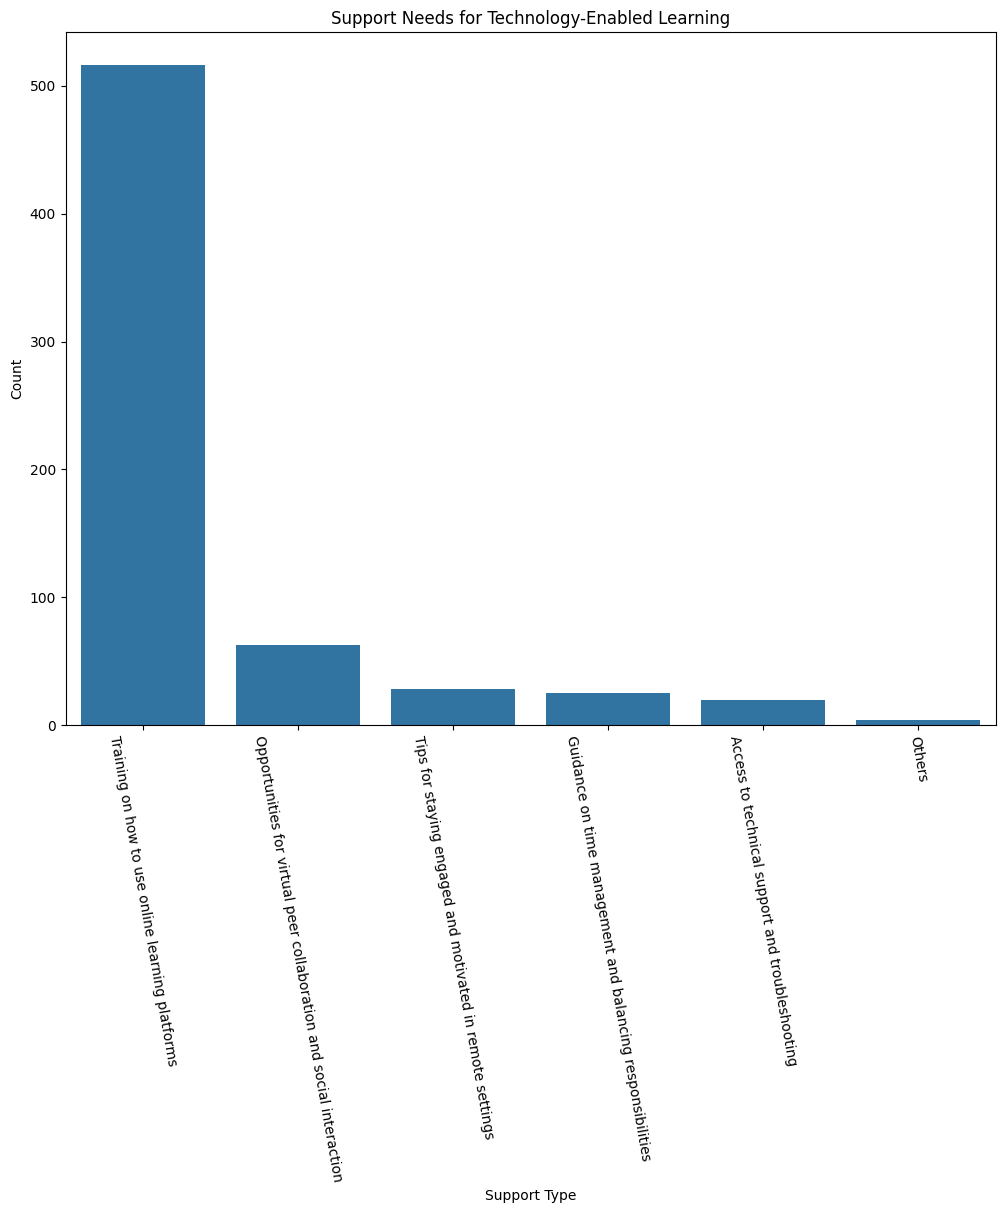

In [60]:

plt.figure(figsize = (12,9))
sns.barplot(data = support_needs)
plt.title("Support Needs for Technology-Enabled Learning")
plt.xlabel("Support Type")
plt.ylabel("Count")
plt.xticks(rotation=-80)
plt.savefig("tech_enabled.png")
plt.show()

In [61]:
df["What is your preferred learning style?"].unique()

array(['Visual (videos, diagrams)', 'Kinesthetic (hands-on activities)',
       'Auditory (lectures, discussions)'], dtype=object)

**Male Preferred Learning Styles:**
What is your preferred learning style?
Visual (videos, diagrams)            71
Auditory (lectures, discussions)     41
Kinesthetic (hands-on activities)    21
Name: count, dtype: int64

**Female Preferred Learning Styles:**
What is your preferred learning style?
Visual (videos, diagrams)            40
Auditory (lectures, discussions)     28
Kinesthetic (hands-on activities)    26
Name: count, dtype: int64


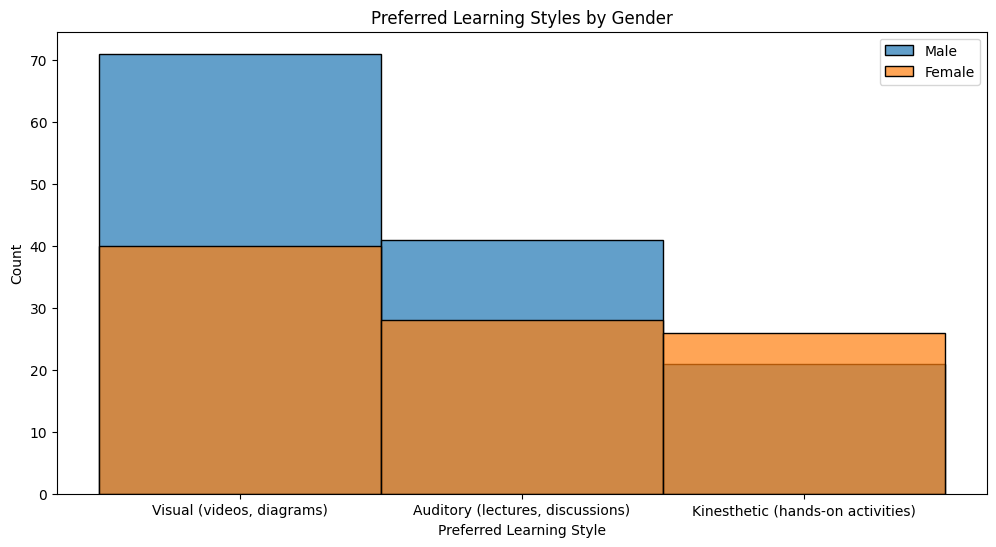

In [62]:
df_filtered = df[df['Have you used an online learning platform before?'] == 'Yes']

df_male = df_filtered[df_filtered['Gender'] == 'Male']
df_female = df_filtered[df_filtered['Gender'] == 'Female']

# Count preferred learning styles for males and females
male_counts = df_filtered[df_filtered['Gender'] == 'Male']['What is your preferred learning style?'].value_counts()
female_counts = df_filtered[df_filtered['Gender'] == 'Female']['What is your preferred learning style?'].value_counts()

# Print value counts for both genders
print("**Male Preferred Learning Styles:**")
print(male_counts)

print("\n**Female Preferred Learning Styles:**")
print(female_counts)

plt.figure(figsize=(12, 6))
sns.histplot(df_male['What is your preferred learning style?'], bins=20, alpha=0.7, label='Male')
sns.histplot(df_female['What is your preferred learning style?'], bins=20, alpha=0.7, label='Female')
plt.title("Preferred Learning Styles by Gender")
plt.xlabel("Preferred Learning Style")
plt.ylabel("Count")
plt.legend()
plt.savefig("learning_style.png")
plt.show()

In [63]:
df["Have you heard about the TeOSS project before?"].unique()

array(['No', 'Yes'], dtype=object)

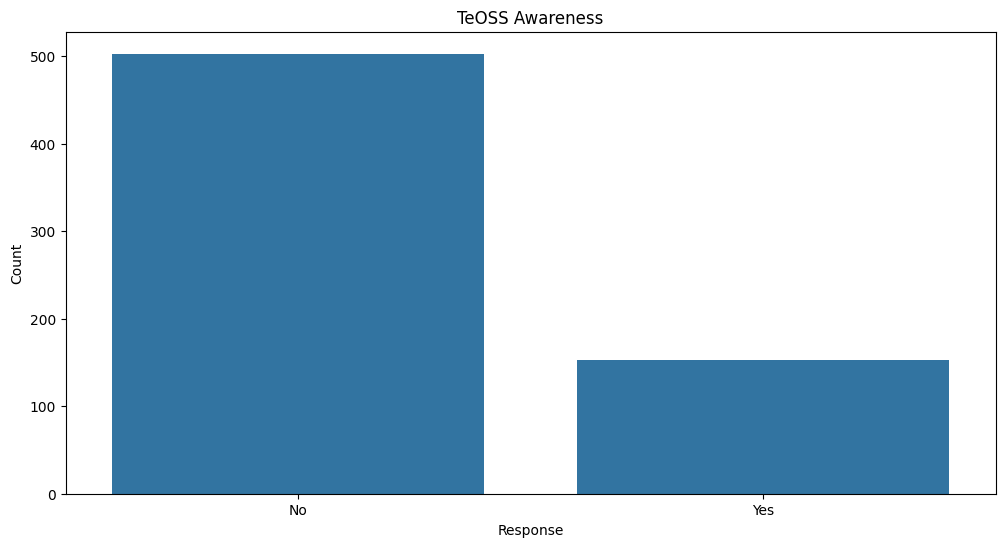

In [81]:
teoss_awareness = df["Have you heard about the TeOSS project before?"].value_counts()
teoss_awareness

plt.figure(figsize=(12, 6))
sns.barplot(data = teoss_awareness)
plt.title("TeOSS Awareness")
plt.xlabel("Response")
plt.ylabel("Count")

plt.savefig("teoss_aware.png")
plt.show()